In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Figure 6b

In [2]:
import sys
sys.path.append('/home/links/ct715/eddy_feedback/')
import functions.eddy_feedback as ef
import functions.plotting as plot
import functions.data_wrangling as data 

# SPARC Datasets
ds = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/srip_datasets/era_int_TEM_ubar_div1.nc')
ds2 = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/srip_datasets/jra55_TEM_ubar_div1.nc')
ds3 = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/srip_datasets/ncep_ncar_TEM_ubar_div1.nc')

# Daily JRA55 calculated using aostools
jra = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/jra55_daily/jra55_ubar_ep-both.nc')
jra = jra.isel(lat=slice(None,None,-1))
jra = jra.sel(level=ds.pressure.values) 

## Full Primitive Version

In [3]:
r = ef.calculate_efp_latitude(ds, check_variables=True)
r2 = ef.calculate_efp_latitude(ds2, check_variables=True)
r3 = ef.calculate_efp_latitude(ds3, check_variables=True)

r_jra = ef.calculate_efp_latitude(jra) 

In [4]:
r_jra 

<xarray.DataArray (lat: 37)>
array([2.37763290e-03, 1.46197256e-02, 2.34738826e-03, 2.50987897e-05,
       4.02609675e-03, 7.30124097e-03, 1.23352962e-02, 5.82296786e-03,
       1.35241542e-02, 1.07445183e-01, 2.24717906e-01, 2.98056098e-01,
       2.87766445e-01, 3.12573095e-01, 3.30790185e-01, 2.78180761e-01,
       3.18871265e-01, 4.20143121e-01, 4.97541497e-01, 5.42756268e-01,
       5.17300561e-01, 4.84413777e-01, 4.48559947e-01, 4.46411381e-01,
       5.24533099e-01, 5.37610405e-01, 4.64550421e-01, 3.52558851e-01,
       2.28351092e-01, 1.08779622e-01, 5.05539544e-02, 2.76867212e-02,
       2.17089968e-02, 2.07437733e-03, 1.40786245e-02, 4.03137566e-02,
       1.36193623e-02])
Coordinates:
  * lat      (lat) float64 0.0 2.5 5.0 7.5 10.0 ... 80.0 82.5 85.0 87.5 90.0

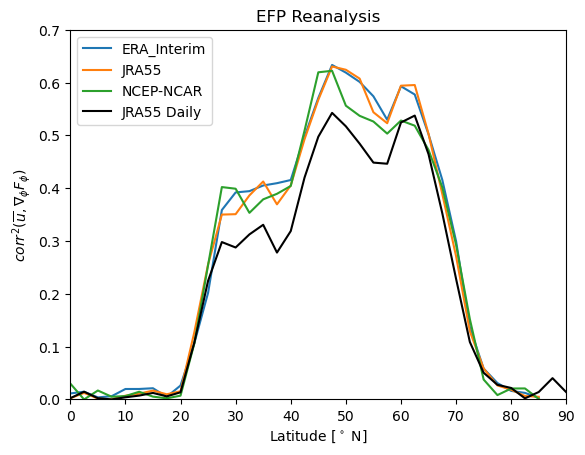

In [5]:
r.plot(label='ERA_Interim')
r2.plot(label='JRA55')
r3.plot(label='NCEP-NCAR') 

r_jra.plot(label='JRA55 Daily', color='k') 

plt.ylim([0, 0.7])
plt.xlim([0,90])

plt.title('EFP Reanalysis')
plt.ylabel('$corr^2(\\overline{u}, \\nabla_{\\phi} F_{\\phi})$')
plt.xlabel('Latitude [$^\\circ$ N]')
plt.legend()
plt.show()

## Quasi-geostrophic Version

In [6]:
r = ef.calculate_efp_latitude(ds, which_div1='div1_qg', check_variables=True)
r2 = ef.calculate_efp_latitude(ds2, which_div1='div1_qg', check_variables=True)
r3 = ef.calculate_efp_latitude(ds3, which_div1='div1_qg', check_variables=True)

r_jra = ef.calculate_efp_latitude(jra, which_div1='div1_qg')

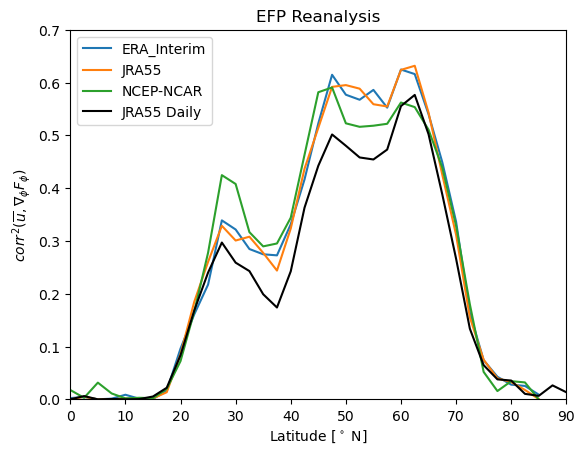

In [7]:
r.plot(label='ERA_Interim')
r2.plot(label='JRA55')
r3.plot(label='NCEP-NCAR') 

r_jra.plot(label='JRA55 Daily', color='k') 

plt.ylim([0, 0.7])
plt.xlim([0,90])

plt.title('EFP Reanalysis')
plt.ylabel('$corr^2(\\overline{u}, \\nabla_{\\phi} F_{\\phi})$')
plt.xlabel('Latitude [$^\\circ$ N]')
plt.legend()
plt.show()

In [10]:
r3

<xarray.DataArray (lat: 37)>
array([1.78744677e-02, 3.05675775e-03, 3.18236821e-02, 1.13513702e-02,
       1.99817461e-03, 3.14742854e-03, 2.41440616e-03, 2.01809716e-02,
       7.25749166e-02, 1.66739832e-01, 2.77874332e-01, 4.24792313e-01,
       4.08056413e-01, 3.16812728e-01, 2.89899107e-01, 2.95378472e-01,
       3.44217865e-01, 4.63297437e-01, 5.81835939e-01, 5.90865405e-01,
       5.22952890e-01, 5.16341152e-01, 5.18440332e-01, 5.22070757e-01,
       5.62341586e-01, 5.53652690e-01, 5.10912100e-01, 4.38952982e-01,
       3.29044807e-01, 1.80173291e-01, 5.21885473e-02, 1.58850819e-02,
       3.45958273e-02, 3.22366405e-02, 9.63004964e-06,            nan,
                  nan])
Coordinates:
  * lat      (lat) float32 0.0 2.5 5.0 7.5 10.0 ... 80.0 82.5 85.0 87.5 90.0